<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 3.1 Hello World

In [1]:
# 3.1 Hello World 프로그램
print("Hello, World!")

Hello, World!


In [2]:
# 3.2 Hello World 프로그램 첫 줄의 # 를 지웠을 때 에러가 나는 모습
#3.1 Hello World
print("Hello, World!")

Hello, World!


In [3]:
# 3.3 Hello World 프로그램 문자열의 따옴표(“)를 홑따옴표(‘)로 바꿈
print('Hello, World!')

Hello, World!


# 3.2 Hello 텐서플로 2.0

In [4]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [5]:
# Google Colab 운영체제 확인
import platform
print(platform.platform())

Windows-10-10.0.19044-SP0


In [6]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.13.0


In [7]:
# 3.6 텐서플로우 불러오기, 버전 확인 에러
import tensorflow as tf
print(tf.__version__)

2.13.0


# 3.3 텐서플로 기초

## 3.3.1 랜덤한 수 생성

In [8]:
# 3.7 랜덤한 수 얻기 (균일 분포)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.3358643], shape=(1,), dtype=float32)


In [9]:
# 3.8 랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.36166954 0.5900023  0.3194939  0.03626776], shape=(4,), dtype=float32)


In [10]:
# 3.9 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([ 0.12568909 -0.20031402  1.1454785   0.16067807], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

In [11]:
# 3.10 sigmoid 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [12]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x * w)
print(output)

0.4878320201956848


In [13]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.10108736639770559 0.10108736639770559
199 -0.05205901061572209 0.05205901061572209
299 -0.03471507805191141 0.03471507805191141
399 -0.02595999762469776 0.02595999762469776
499 -0.020703743087664584 0.020703743087664584


599 -0.017205478520270198 0.017205478520270198
699 -0.014712444319272289 0.014712444319272289
799 -0.012847064776641931 0.012847064776641931
899 -0.011399434849007543 0.011399434849007543
999 -0.010243713042210499 0.010243713042210499


In [14]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [15]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.06400324510397903 0.935996754896021
199 0.03976687270482815 0.9602331272951719
299 0.02871436506722025 0.9712856349327798
399 0.022429214774888018 0.977570785225112
499 0.01838516469343543 0.9816148353065646
599 0.01556883390545738 0.9844311660945426
699 0.013496530119529448 0.9865034698804706
799 0.011908651953255855 0.9880913480467441
899 0.01065355114848332 0.9893464488515167
999 0.009636791972291725 0.9903632080277083


## 3.3.3 첫번째 신경망 네트워크 : AND

In [16]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [17]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.11488860586521452
399 -0.06728824693560527
599 -0.04748042655111776
799 -0.0365738860817224
999 -0.029686060645914877
1199 -0.02495165714607742
1399 -0.021502439317780085
1599 -0.018882281821572117
1799 -0.016823039921199778
1999 -0.015165441287385081


In [18]:
# 3.17 파이썬에서 리스트에 정수를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [19]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
print([1,2,3]*0.01)

TypeError: can't multiply sequence by non-int of type 'float'

In [20]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [21]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9645949048755158
X: [1 0] Y: [0] Output: 0.02508778225916405
X: [0 1] Y: [0] Output: 0.025165151758688636
X: [0 0] Y: [0] Output: 2.4382345403607576e-05


## 3.3.4 두번째 신경망 네트워크 : OR

In [22]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.051311112446353335
399 -0.026381982002586846
599 -0.01763091641904936
799 -0.013190768210727788
999 -0.010517226200504097
1199 -0.008735357098406983
1399 -0.007465162738727264
1599 -0.006514482684075708
1799 -0.005777122730666363
1999 -0.005187397998338263


In [23]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999971432889359
X: [1 0] Y: [1] Output: 0.989711431817423
X: [0 1] Y: [1] Output: 0.9896966022769423
X: [0 0] Y: [0] Output: 0.025717452660985893


## 3.3.5 세번째 신경망 네트워크 : XOR

In [24]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 0.0006141258961639418
399 2.4965481224104025e-05
599 1.0135439713065963e-06
799 2.792131970075218e-09
999 1.8614210173240053e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [25]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


In [26]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


In [27]:
# 3.26 AND 네트워크의 w, b 값 확인
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)

In [41]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2875
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2838
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2775
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2746
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2723
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2700
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2682
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2665
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2651
Epoch 11/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.2639
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 13/2000
4/4 [=============================

In [43]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

1/1 [==============================] - 0s 107ms/step


array([[0.10030825],
       [0.9044066 ],
       [0.898399  ],
       [0.11460347]], dtype=float32)

In [44]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-4.435777 ,  4.629022 ],
       [ 4.1824746, -4.7697   ]], dtype=float32)>
<tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([-2.3890052, -2.7242296], dtype=float32)>
<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[5.928676 ],
       [5.9136453]], dtype=float32)>
<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([-2.906691], dtype=float32)>


# 3.4 시각화 기초

## 3.4.1	matplotlib.pyplot 을 사용한 그래프 그리기

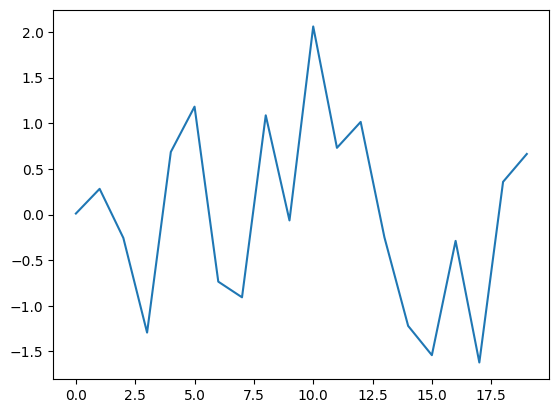

In [32]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

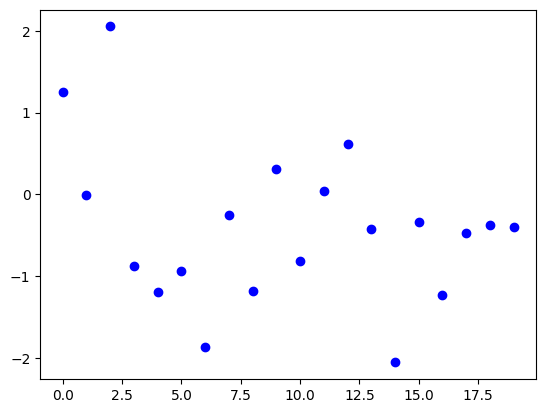

In [33]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

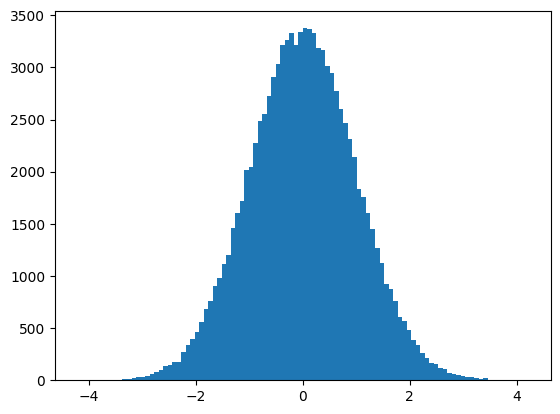

In [34]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

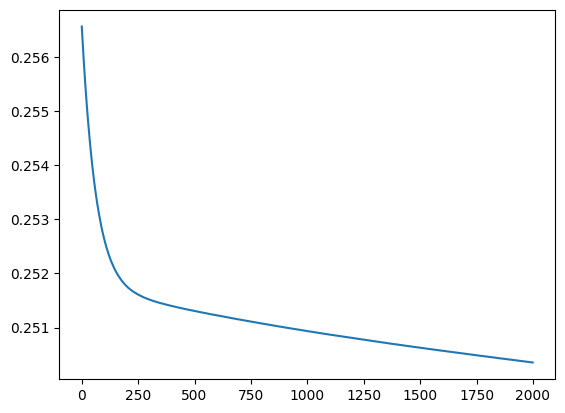

In [35]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])